In [69]:
import ast
import pandas as pd
import re
from spacy.lang.fr.stop_words import STOP_WORDS
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Dataset

In [42]:
df = pd.read_csv(r'C:\Users\arceb\PycharmProjects\Projet_DSSS_2023\data_cleaned/initial_corpus.csv')
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde
...,...,...,...,...,...,...,...,...
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, i...","nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
8914,La Croix,Migrants en mer Egée : «Ça a été les deux heur...,2020-04-15,NaN,"Les faits En 2015, des «?zones de transit?» av...",nt été mises en place par le pays dans les vil...,programme lancé en 2015 de répartition par Éta...,Croix
8915,Le Figaro,"Migrants: Dakhla, point de départ du grand cou...",2020-04-14,NaN,Bruxelles espère arriver à des « résultats imp...,ants » en 2021 sur la réforme de l'asile prése...,oit d'asile depuis le pays européen où ils son...,Figaro
8916,Le Figaro,Pacte migratoire?: les pays du sud sauveront-i...,2020-04-12,NaN,C'EST L'UNE des rares bonnes nouvelles de l'an...,"2020 : la pandémie, grâce au plan de relance ...",une victoire à la Pyrrhus... Et dans tous les ...,Figaro


### CAMEMBERT

In [3]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="Peed911/french_sentiment_analysis")

In [4]:
terms_mentioned_syria = [
    "Syrie", "syrien", "syrienne", "Damas"
]
filtered_articles_syria = df[df["Texte"].str.contains('|'.join(terms_mentioned_syria), case=False)]

terms_mentioned_ukraine = [
    "Ukraine", "ukrainien", "ukrainienne", "Kiev"
]
filtered_articles_ukraine = df[df["Texte"].str.contains('|'.join(terms_mentioned_ukraine), case=False)]

terms_mentioned_afghanistan = [
    "Afghanistan", "afghan", "afghane", "Kaboul"
]
filtered_articles_afghanistan = df[df["Texte"].str.contains('|'.join(terms_mentioned_afghanistan), case=False)]

In [76]:
filtered_articles_syria

,Journal,titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
5,Le Monde (site web),Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde
7,Le Monde,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde
12,Le Figaro (site web),Coralie Delaume: «Un choc externe pourrait provoquer l’éclatement de l’Union européenne»,2020-03-11,"Imad, Joachim","Coralie Delaume est essayiste. Elle a notamment écrit Le Couple franco-allemand n’existe pas (Michalon, 2018) et 10+1 Questions sur l’Union europé...","crit Le Couple franco-allemand n’existe pas (Michalon, 2018) et 10+1 Questions sur l’Union européenne",on approche du la fin. De celle de l’Union européenne et de celle de ce dont elle est un avatar: la m,Figaro
13,La Croix (site web),Crise migratoire?: bras de fer autour de la frontière gréco-turque,2020-03-11,Marie Verdier,"Après la visite du président turc Recep Tayyip Erdogan à Bruxelles, lundi 9 mars, Emmanuel Macron et la chancelière allemande Angela Merkel doiven...","dogan à Bruxelles, lundi 9 mars, Emmanuel Macron et la chancelière allemande Angela Merkel doivent se",nement pour faire face à l'afflux migratoire et pour protéger les frontières à Evros et sur les îles.,Croix
14,Le Figaro (site web),Syrie: le président turc demande le «soutien concret» de l'Otan,2020-03-09,Le Figaro avec AFP,"Le président turc Recep Tayyip Erdogan a demandé à l'Otan son « soutien concret » dans le conflit en Syrie, lors d'une visite à Bruxelles lundi. ...","à l'Otan son « soutien concret » dans le conflit en Syrie, lors d'une visite à Bruxelles lundi. » L","un pays voisin, rejette la faute sur la Turquie », a-t-il déclaré. » LIRE AUSSI - Turquie : des mil",Figaro
...,...,...,...,...,...,...,...,...
8878,Libération,Allemagne?: prison à vie pour le néonazi meurtrier de Walter Lübcke,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la marche du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hira...","e du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hirak, s","mulé, au cours des dix dernières années, un bagage d'expériences, de débats, parfois de polémiques, d",Libération
8901,Le Figaro,Réforme de l'asile : Bruxelles espère des avancées en 2021,2020-07-14,NaN,"Le nombre de demandes d'asile en Allemagne a baissé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, ...","sé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, aprè","s associations, malgré l'assurance du gouvernement que ne seront concernés uniquement ceux qu'il cons",Figaro
8904,Le Monde,L'Allemagne envisage de reprendre des expulsions vers la Syrie,2020-06-26,NaN,"On ne misait plus grand-chose sur le cinéma de Kornel Mundruczo après La Lune de Jupiter (2017), improbable allégorie de la crise migratoire revue...","rnel Mundruczo après La Lune de Jupiter (2017), improbable allégorie de la crise migratoire revue et","e départ, qu'il faudra pourtant bien reconnaître comme advenue

In [8]:
# Function to split text into three rows
def split_text(row):
    texts = row['Texte'].split('. ')
    return pd.Series(texts)

# Apply the function to each row and stack the resulting rows
new_df = filtered_articles_syria.apply(split_text, axis=1).stack().reset_index(level=1, drop=True).to_frame('Texte')

# Merge the other columns from the original DataFrame
new_df = new_df.join(filtered_articles_syria.drop('Texte', axis=1), how='left')

# Reset index if needed
new_df.reset_index(drop=True, inplace=True)
new_df


,Texte,Journal,Titre,Date,Auteur,extrait_debut,extrait_fin,CJournal
0,On ne peut pas vous reprocher de penser que le...,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
1,"Du lundi 16 au jeudi 19 mars, plus de 70 % des...",Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
2,"Virus mis à part, plusieurs événements ont, ce...",Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
3,En voici une petite sélection,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
4,Première condamnation dans le scandale de ...,Le Monde (site web),Les sept infos non liées au coronavirus que vo...,2020-03-20,Le Monde,nde s’est arrêté de tourner à cause de l’épidé...,"véritable monde alternatif, serein et chaleur...",Monde
...,...,...,...,...,...,...,...,...
94792,Ces guerres civiles ont aussi favorisé des flu...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94793,Si ceux qui ont voulu croire au printemps pe...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94794,Regardez huit ans plus tard la révolte pacifiq...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos
94795,» A moins que le Printemps arabe n'ait été qu...,Les Echos,Crise migratoire aux Canaries : l'Europe doit...,2020-05-27,NaN,"nse, il y a dix ans. Le 17 december2010, le su...",e n'ait été qu'une illustration de cette ligne...,Echos


In [9]:
new_df['Texte'][1]

'Du lundi\xa016 au jeudi 19\xa0mars, plus de 70\xa0% des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’épidémie, sans compter le live animé quotidiennement sur le sujet'

In [10]:
# Creating an empty list to store the results
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in new_df.iterrows():
    try:
        title = row['Titre']  # Accessing the title
        content = row['Texte']
        sentiment = sentiment_analysis(content)
        articles_sentiment.append({'title': title, 'article': content, 'sentiment': sentiment})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

Token indices sequence length is longer than the specified maximum sequence length for this model (983 > 512). Running this sequence through the model will result in indexing errors


Error processing article at index 34895: The expanded size of the tensor (983) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 983].  Tensor sizes: [1, 514]
Error processing article at index 52662: The expanded size of the tensor (679) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 679].  Tensor sizes: [1, 514]


In [11]:
# Creating a new DataFrame from the results
sentiment_df = pd.DataFrame(articles_sentiment)

In [12]:
sentiment_df

,title,article,sentiment
0,Les sept infos non liées au coronavirus que vo...,On ne peut pas vous reprocher de penser que le...,"[{'label': 'Negative', 'score': 0.828849136829..."
1,Les sept infos non liées au coronavirus que vo...,"Du lundi 16 au jeudi 19 mars, plus de 70 % des...","[{'label': 'Negative', 'score': 0.544237256050..."
2,Les sept infos non liées au coronavirus que vo...,"Virus mis à part, plusieurs événements ont, ce...","[{'label': 'Negative', 'score': 0.520146250724..."
3,Les sept infos non liées au coronavirus que vo...,En voici une petite sélection,"[{'label': 'Negative', 'score': 0.700022459030..."
4,Les sept infos non liées au coronavirus que vo...,Première condamnation dans le scandale de ...,"[{'label': 'Negative', 'score': 0.592634558677..."
...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit...,Ces guerres civiles ont aussi favorisé des flu...,"[{'label': 'Positive', 'score': 0.550283968448..."
94791,Crise migratoire aux Canaries : l'Europe doit...,Si ceux qui ont voulu croire au printemps pe...,"[{'label': 'Negative', 'score': 0.638998627662..."
94792,Crise migratoire aux Canaries : l'Europe doit...,Regardez huit ans plus tard la révolte pacifiq...,"[{'label': 'Positive', 'score': 0.756442070007..."
94793,Crise migratoire aux Canaries : l'Europe doit...,» A moins que le Printemps arabe n'ait été qu...,"[{'label': 'Negative', 'score': 0.606117784976..."


### Analyse de sentiments à l'échelle de la phrase pour le corpus Syrie

In [88]:
sentiment_df_syrie=pd.read_excel("sentiment_syrie.xlsx")
sentiment_df_syrie

,title,article,sentiment
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,"[{'label': 'Negative', 'score': 0.8288491368293762}]"
1,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Du lundi 16 au jeudi 19 mars, plus de 70 % des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’ép...","[{'label': 'Negative', 'score': 0.5442372560501099}]"
2,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Virus mis à part, plusieurs événements ont, cependant, continué de nourrir l’actualité, même s’ils ont pu être occultés","[{'label': 'Negative', 'score': 0.5201462507247925}]"
3,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,En voici une petite sélection,"[{'label': 'Negative', 'score': 0.7000224590301514}]"
4,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,Première condamnation dans le scandale de fraude fiscale « CumEx » en Allemagne Deux ex-banquiers britanniques ont été reconnus coupables ...,"[{'label': 'Negative', 'score': 0.5926345586776733}]"
...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,Ces guerres civiles ont aussi favorisé des flux de réfugiés vers l'Europe à l'origine d'une crise migratoire depuis 2015,"[{'label': 'Positive', 'score': 0.5502839684486389}]"
94791,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Si ceux qui ont voulu croire au printemps peuvent paraître naïfs au vu du bilan, Hasni Abidi rappelle toutefois que la démocratie ne s'est jaMay...","[{'label': 'Negative', 'score': 0.6389986276626587}]"
94792,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Regardez huit ans plus tard la révolte pacifique en Algérie, au Liban, en Irak, au Soudan","[{'label': 'Positive', 'score': 0.7564420700073242}]"
94793,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,» A moins que le Printemps arabe n'ait été qu'une illustration de cette ligne du célèbre roman « Le Guépard » : « Il faut que tout change pour q...,"[{'label': 'Negative', 'score': 0.6061177849769592}]"


In [89]:
sentiment_df_syrie['sentiment'] = sentiment_df_syrie['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_syrie['label'] = sentiment_df_syrie['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_syrie['score'] = sentiment_df_syrie['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_syrie.drop(columns=['sentiment'], inplace=True)

sentiment_df_syrie

,title,article,label,score
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,Negative,0.828849
1,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Du lundi 16 au jeudi 19 mars, plus de 70 % des 478 contenus (articles, vidéos et portfolios) publiés en ligne étaient directement consacrés à l’ép...",Negative,0.544237
2,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"Virus mis à part, plusieurs événements ont, cependant, continué de nourrir l’actualité, même s’ils ont pu être occultés",Negative,0.520146
3,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,En voici une petite sélection,Negative,0.700022
4,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,Première condamnation dans le scandale de fraude fiscale « CumEx » en Allemagne Deux ex-banquiers britanniques ont été reconnus coupables ...,Negative,0.592635
...,...,...,...,...
94790,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,Ces guerres civiles ont aussi favorisé des flux de réfugiés vers l'Europe à l'origine d'une crise migratoire depuis 2015,Positive,0.550284
94791,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Si ceux qui ont voulu croire au printemps peuvent paraître naïfs au vu du bilan, Hasni Abidi rappelle toutefois que la démocratie ne s'est jaMay...",Negative,0.638999
94792,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,"Regardez huit ans plus tard la révolte pacifique en Algérie, au Liban, en Irak, au Soudan",Positive,0.756442
94793,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,» A moins que le Printemps arabe n'ait été qu'une illustration de cette ligne du célèbre roman « Le Guépard » : « Il faut que tout change pour q...,Negative,0.606118


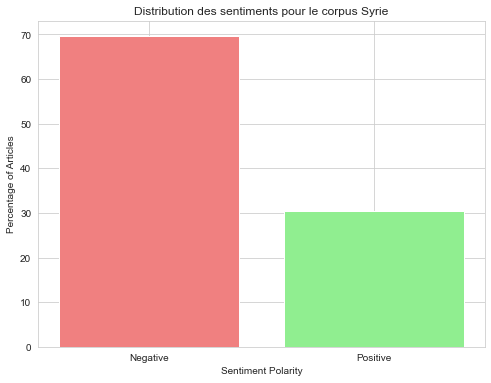

In [98]:
sentiment_counts = sentiment_df_syrie['label'].value_counts()

total_articles = sentiment_df_syrie.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Syrie')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [101]:
print(positive_percentage, negative_percentage)

30.376074687483516 69.62392531251649


### Analyse de sentiments à l'échelle de la phrase pour le corpus Afghanistan

In [103]:
sentiment_df_afghanistan=pd.read_excel("sentiment_afghanistan.xlsx")
sentiment_df_afghanistan

,title,article,sentiment
0,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler","[{'label': 'Positive', 'score': 0.6349100470542908}]"
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Envisagée initialement à Istanbul, la conférence entre Emmanuel Macron, la chancelière Angela Merkel, le premier ministre britannique Boris Johnso...","[{'label': 'Negative', 'score': 0.8275608420372009}]"
2,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",Elle a duré un peu plus d'une heure,"[{'label': 'Negative', 'score': 0.84357088804245}]"
3,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Il s'agissait davantage d'entretenir le lien diplomatique que de parvenir à un résultat, tant les conditions sont défavorables","[{'label': 'Negative', 'score': 0.9093023538589478}]"
4,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Selon l'Elysée, la discussion a confirmé des convergences de vue déjà connues, notamment sur la situation à Idlib, en Syrie","[{'label': 'Positive', 'score': 0.5141595602035522}]"
...,...,...,...
37345,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Le ministre allemand de l'Intérieur, Horst Seehofer, a estimé que cette baisse de près d'un tiers des demande pouvait être partiellement expliqu...","[{'label': 'Negative', 'score': 0.5080079436302185}]"
37346,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Mays pour le ministre, conservateur et favorable à un plus strict contrôle des frontières, cette baisse, continue depuis depuis quatre ans, « mo...","[{'label': 'Positive', 'score': 0.7088020443916321}]"
37347,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Il y a cinq ans, l'ouverture des portes du pays décidée par la chancelière Angela Merkel lors de la crise migratoire européenne avait mené à env...","[{'label': 'Negative', 'score': 0.6412342190742493}]"
37348,Réforme de l'asile : Bruxelles espère des avancées en 2021,"La décision d'autoriser à nouveau, à partir de January 2021, les expulsions vers une Syrie dévastée par la guerre avait été vivement critiquée p...","[{'label': 'Negative', 'score': 0.5330063104629517}]"


In [104]:
sentiment_df_afghanistan['sentiment'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_afghanistan['label'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_afghanistan['score'] = sentiment_df_afghanistan['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_afghanistan.drop(columns=['sentiment'], inplace=True)

sentiment_df_afghanistan

,title,article,label,score
0,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler",Positive,0.634910
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Envisagée initialement à Istanbul, la conférence entre Emmanuel Macron, la chancelière Angela Merkel, le premier ministre britannique Boris Johnso...",Negative,0.827561
2,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",Elle a duré un peu plus d'une heure,Negative,0.843571
3,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Il s'agissait davantage d'entretenir le lien diplomatique que de parvenir à un résultat, tant les conditions sont défavorables",Negative,0.909302
4,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","Selon l'Elysée, la discussion a confirmé des convergences de vue déjà connues, notamment sur la situation à Idlib, en Syrie",Positive,0.514160
...,...,...,...,...
37345,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Le ministre allemand de l'Intérieur, Horst Seehofer, a estimé que cette baisse de près d'un tiers des demande pouvait être partiellement expliqu...",Negative,0.508008
37346,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Mays pour le ministre, conservateur et favorable à un plus strict contrôle des frontières, cette baisse, continue depuis depuis quatre ans, « mo...",Positive,0.708802
37347,Réforme de l'asile : Bruxelles espère des avancées en 2021,"Il y a cinq ans, l'ouverture des portes du pays décidée par la chancelière Angela Merkel lors de la crise migratoire européenne avait mené à env...",Negative,0.641234
37348,Réforme de l'asile : Bruxelles espère des avancées en 2021,"La décision d'autoriser à nouveau, à partir de January 2021, les expulsions vers une Syrie dévastée par la guerre avait été vivement critiquée p...",Negative,0.533006


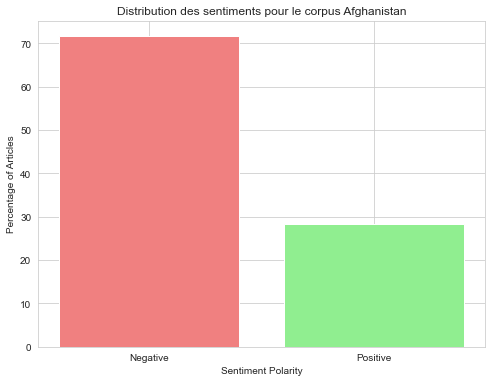

In [106]:
sentiment_counts = sentiment_df_afghanistan['label'].value_counts()

total_articles = sentiment_df_afghanistan.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Afghanistan')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [107]:
print(positive_percentage, negative_percentage)

28.310575635876837 71.68942436412316


### Analyse de sentiments à l'échelle de la phrase pour le corpus Ukraine

In [108]:
sentiment_df_ukraine=pd.read_excel("sentiment_ukraine.xlsx")
sentiment_df_ukraine

,title,article,sentiment
0,BHL : « Cette société française me fait peur »,"Vous avez entrepris, depuis quelques semaines, de vous rendre sur plusieurs théâtres de conflit","[{'label': 'Negative', 'score': 0.5771799087524414}]"
1,BHL : « Cette société française me fait peur »,"Oui, pour votre confrère « Paris-Match »","[{'label': 'Negative', 'score': 0.5900015830993652}]"
2,BHL : « Cette société française me fait peur »,"C'est une série de guerres relativement oubliées, mais qui, elles, ne nous oublient pas, car s'y dessine notre destin","[{'label': 'Positive', 'score': 0.9383765459060669}]"
3,BHL : « Cette société française me fait peur »,"Le Nigeria, où s'opère, dans l'indifférence générale, un massacre des chrétiens","[{'label': 'Negative', 'score': 0.6023626923561096}]"
4,BHL : « Cette société française me fait peur »,"Le Kurdistan syrien, où j'ai vu les premiers effets de l'ahurissant retrait militaire américain","[{'label': 'Positive', 'score': 0.5755218267440796}]"
...,...,...,...
25028,"Mark Rutte, le Hollandais gagnant",La France fait partie de ces passages clandestins,"[{'label': 'Positive', 'score': 0.6263477802276611}]"
25029,"Mark Rutte, le Hollandais gagnant","En l'absence d'imperium dur, en l'absence de chef d'orchestre, elle s'est montrée structurellement impuissante à dépenser moins","[{'label': 'Negative', 'score': 0.9412612915039062}]"
25030,"Mark Rutte, le Hollandais gagnant","Comprendre qu'il faut travailler plus et plus longtemps, et réduire la voilure d'une protection sociale devenue folle lui est, semble-t-il, imposs...","[{'label': 'Negative', 'score': 0.8868638873100281}]"
25031,"Mark Rutte, le Hollandais gagnant",C'est la défaite française,"[{'label': 'Negative', 'score': 0.7851486206054688}]"


In [109]:
sentiment_df_ukraine['sentiment'] = sentiment_df_ukraine['sentiment'].apply(lambda x: ast.literal_eval(x))

# Extracting label and score into separate columns
sentiment_df_ukraine['label'] = sentiment_df_ukraine['sentiment'].apply(lambda x: x[0]['label'])
sentiment_df_ukraine['score'] = sentiment_df_ukraine['sentiment'].apply(lambda x: x[0]['score'])

# Drop the original 'sentiment' column if needed
sentiment_df_ukraine.drop(columns=['sentiment'], inplace=True)

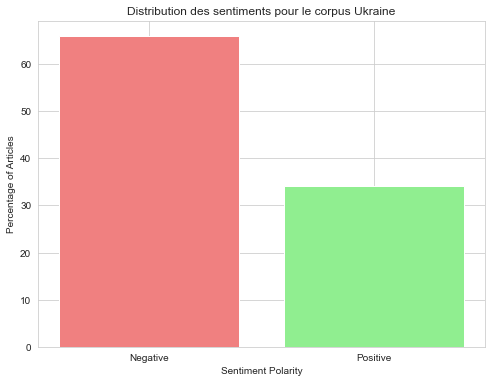

In [110]:
sentiment_counts = sentiment_df_ukraine['label'].value_counts()

total_articles = sentiment_df_ukraine.shape[0]
positive_percentage = (sentiment_counts['Positive'] / total_articles) * 100
negative_percentage = (sentiment_counts['Negative'] / total_articles) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [negative_percentage, positive_percentage], color=['lightcoral', 'lightgreen'])
plt.title('Distribution des sentiments pour le corpus Ukraine')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Percentage of Articles')
plt.show()

In [111]:
print(positive_percentage, negative_percentage)

34.10697878799984 65.89302121200016


### Polarité à l'échelle du titre

In [45]:
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    try:
        titre = row['Titre']
        newspaper = row['CJournal']
        date = row['Date']
        content = row['Titre']
        sentiment = sentiment_analysis(content)
        articles_sentiment.append({'titre': titre,'sentiment': sentiment, 'date': date, 'journal': newspaper})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

In [46]:
sentiment_df = pd.DataFrame(articles_sentiment)
sentiment_df

,titre,sentiment,date,journal
0,L'agenda caché de Moscou en Italie,"[{'label': 'Negative', 'score': 0.609222590923...",2020-03-30,Figaro
1,Récit Les trois semaines qui ont chamboulé l...,"[{'label': 'Positive', 'score': 0.529968202114...",2020-03-27,Monde
2,Élargissement de l’Union européenne à l’heure ...,"[{'label': 'Negative', 'score': 0.766176283359...",2020-03-26,Figaro
3,Coronavirus : les trois semaines qui ont chamb...,"[{'label': 'Negative', 'score': 0.597621440887...",2020-03-26,Monde
4,Marc Lazar : « Plus l’Italie fait nation face ...,"[{'label': 'Negative', 'score': 0.677632212638...",2020-03-25,Monde
...,...,...,...,...
8913,Crise migratoire aux Canaries : l'Europe doit...,"[{'label': 'Negative', 'score': 0.608736038208...",2020-05-27,Echos
8914,Migrants en mer Egée : «Ça a été les deux heur...,"[{'label': 'Positive', 'score': 0.821567595005...",2020-04-15,Croix
8915,"Migrants: Dakhla, point de départ du grand cou...","[{'label': 'Positive', 'score': 0.638566315174...",2020-04-14,Figaro
8916,Pacte migratoire?: les pays du sud sauveront-i...,"[{'label': 'Negative', 'score': 0.632294893264...",2020-04-12,Figaro


In [48]:
sentiment_df.to_excel('sentiment_title.xlsx', index=False)

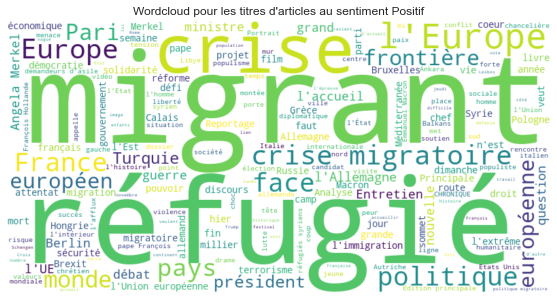

In [71]:
# Function to get sentiment polarity
def get_sentiment_polarity(sentiment):
    label = sentiment[0]['label']
    if label == 'Positive':
        return 1
    elif label == 'Negative':
        return -1
    else:
        return 0

# Apply sentiment analysis to each article
sentiment_df['sentiment_polarity'] = sentiment_df['sentiment'].apply(get_sentiment_polarity)

# Word Cloud
positive_articles = " ".join(sentiment_df[sentiment_df['sentiment_polarity'] == 1]['titre'])
negative_articles = " ".join(sentiment_df[sentiment_df['sentiment_polarity'] == -1]['titre'])

with open('stop_word_fr.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

# Generate Word Cloud for positive articles
wordcloud_positive = WordCloud(width=800, height=400, stopwords=stopwords, background_color ='white').generate(positive_articles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud pour les titres d\'articles au sentiment Positif')
plt.axis('off')
plt.show()

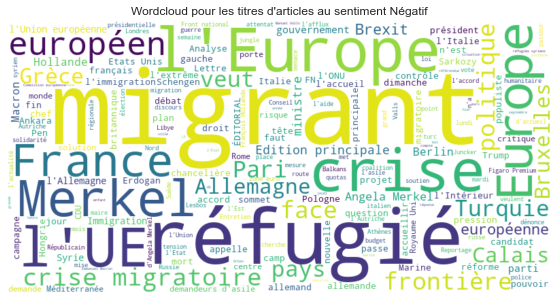

In [73]:
# Generate Word Cloud for negative articles
wordcloud_negative = WordCloud(width=800, height=400, stopwords=stopwords, background_color ='white').generate(negative_articles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud pour les titres d\'articles au sentiment Négatif')
plt.axis('off')
plt.show()

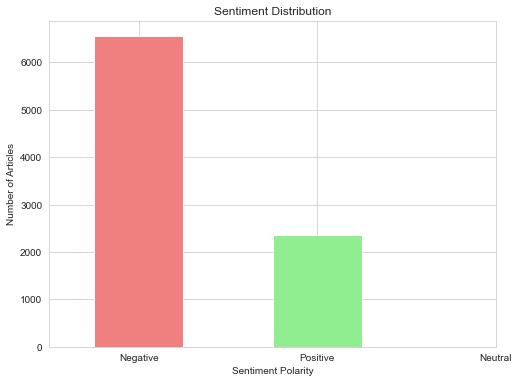

In [87]:
sentiment_counts = sentiment_df['sentiment_polarity'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[ 'lightcoral', 'lightgreen', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Articles')
plt.xticks([0, 1, 2], [ 'Negative', 'Positive','Neutral'], rotation=0)
plt.show()

In [85]:
grouped_df

sentiment_polarity,-1,1
journal,,
Croix,438,359
Echos,943,321
Figaro,2420,610
Libération,626,280
Monde,1570,662
Parisien,554,135


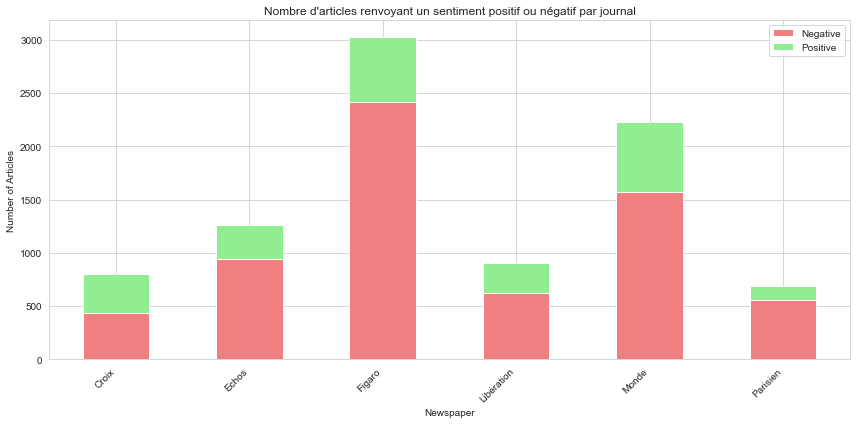

In [84]:
grouped_df = sentiment_df.groupby(['journal', 'sentiment_polarity']).size().unstack(fill_value=0)

# Plot with specified colors
colors = { -1: 'lightcoral', 1: 'lightgreen'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

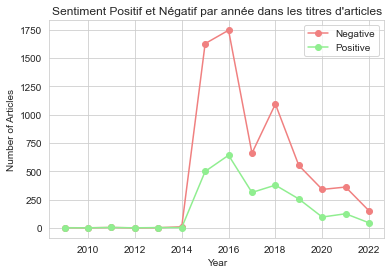

In [139]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Extract year from the 'date' column
sentiment_df['year'] = sentiment_df['date'].dt.year

# Group by year and sentiment polarity and count the number of articles
sentiment_count = sentiment_df.groupby(['year', 'sentiment_polarity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les titres d'articles")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

In [61]:
negatif=sentiment_df[sentiment_df["sentiment_polarity"]==-1]
negatif

,titre,sentiment,date,journal,sentiment_polarity
0,L'agenda caché de Moscou en Italie,"[{'label': 'Negative', 'score': 0.609222590923...",2020-03-30,Figaro,-1
2,Élargissement de l’Union européenne à l’heure ...,"[{'label': 'Negative', 'score': 0.766176283359...",2020-03-26,Figaro,-1
3,Coronavirus : les trois semaines qui ont chamb...,"[{'label': 'Negative', 'score': 0.597621440887...",2020-03-26,Monde,-1
4,Marc Lazar : « Plus l’Italie fait nation face ...,"[{'label': 'Negative', 'score': 0.677632212638...",2020-03-25,Monde,-1
5,Les sept infos non liées au coronavirus que vo...,"[{'label': 'Negative', 'score': 0.747376024723...",2020-03-20,Monde,-1
...,...,...,...,...,...
8910,Espagne : plus de 8000 migrants aux Canaries e...,"[{'label': 'Negative', 'score': 0.529679834842...",2020-06-25,Monde,-1
8912,Immigration?: l'Union européenne ménage le Maroc,"[{'label': 'Negative', 'score': 0.817849576473...",2020-06-08,Figaro,-1
8913,Crise migratoire aux Canaries : l'Europe doit...,"[{'label': 'Negative', 'score': 0.608736038208...",2020-05-27,Echos,-1
8916,Pacte migratoire?: les pays du sud sauveront-i...,"[{'label': 'Negative', 'score': 0.632294893264...",2020-04-12,Figaro,-1


In [63]:
pd.set_option('display.max_colwidth', 150)
print(negatif['titre'].head(50))

0                                                                                                                        L'agenda caché de Moscou en Italie
2                                                Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»
3                                                                     Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne
4                                                   Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »
5                                                                    Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine
6                                                                                       Géopolitique | chronique   Nous sommes tous des migrants contrariés
8                                                               

In [67]:
positif=sentiment_df[sentiment_df["sentiment_polarity"]==1]
positif

,titre,sentiment,date,journal,sentiment_polarity
1,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...","[{'label': 'Positive', 'score': 0.5299682021141052}]",2020-03-27,Monde,1
7,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","[{'label': 'Positive', 'score': 0.60658198595047}]",2020-03-19,Monde,1
16,Erdogan réclame plus de soutien de l'UE et de l'Otan,"[{'label': 'Positive', 'score': 0.5220890045166016}]",2020-03-09,Libération,1
23,Frans Timmermans : « Ce projet de loi est révolutionnaire »,"[{'label': 'Positive', 'score': 0.8695123195648193}]",2020-03-05,Figaro,1
25,Il faut défendre les frontières de l'Europe !,"[{'label': 'Positive', 'score': 0.5539216995239258}]",2020-03-03,Figaro,1
...,...,...,...,...,...
8903,"L'obstruction de Varsovie et Budapest, symbole d'une fracture entre deux Europe","[{'label': 'Positive', 'score': 0.604512095451355}]",2020-06-25,Parisien,1
8907,"En République démocratique du Congo, le grand retour des éléphants","[{'label': 'Positive', 'score': 0.6180530190467834}]",2020-06-25,Monde,1
8911,"« La Turquie d'Erdogan, ce laboratoire belliciste aux portes de l'Europe »","[{'label': 'Positive', 'score': 0.5465911626815796}]",2020-06-11,Figaro,1
8914,Migrants en mer Egée : «Ça a été les deux heures les plus longues de ma vie»,"[{'label': 'Positive', 'score': 0.8215675950050354}]",2020-04-15,Croix,1


In [68]:
pd.set_option('display.max_colwidth', 150)
print(positif['titre'].head(50))

1      Récit   Les trois semaines qui ont chamboulé l'orthodoxie économique européenne  Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...
7      Télésommet sur Idlib entre les Européens et Erdogan  La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...
16                                                                                                      Erdogan réclame plus de soutien de l'UE et de l'Otan
23                                                                                               Frans Timmermans : « Ce projet de loi est révolutionnaire »
25                                                                                                             Il faut défendre les frontières de l'Europe !
26     Syrie, un cauchemar sans fin  Des milliers de réfugiés syriens se pressent aux portes de l'Europe après l'ouverture par la Turquie de ses frontières.
39                                                        

#### Syrie

In [140]:
filtered_articles_syria = filtered_articles_syria.rename(columns={'Titre': 'titre'})
merged_df_syria = pd.merge(sentiment_df, filtered_articles_syria, on='titre', how='inner')
merged_df_syria

,titre,sentiment,date,journal,sentiment_polarity,year,Journal,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,"[{'label': 'Negative', 'score': 0.747376024723053}]",2020-03-20,Monde,-1,2020,Le Monde (site web),2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde
1,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...","[{'label': 'Positive', 'score': 0.60658198595047}]",2020-03-19,Monde,1,2020,Le Monde,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde
2,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,2020,"Le Figaro, no. 22442",2016-10-05,"Isaac, Jean-Baptiste",Menace d'attentat : un jeune homme de 18 ans mis en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis...,en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis en,": nécessité fait loi. Aux responsables politiques, il revient de faire un juste usage des frontières",Figaro
3,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,2020,"Le Figaro, no. 22530",2017-01-16,"Connan, Julie",L'EI progresse dans l'est de la Syrie L'État islamique a gagné du terrain ces dernières heures face aux forces du régime syrien dans la région de ...,mique a gagné du terrain ces dernières heures face aux forces du régime syrien dans la région de Deir,"pays avait reçu 90 000 demandes en 2015, au plus fort de la crisemigratoire, et avait décidé d'introd",Figaro
4,EN BREF,"[{'label': 'Negative', 'score': 0.8144431710243225}]",2020-03-12,Figaro,-1,2020,"Le Figaro, no. 22326",2016-05-21,"Connan, Julie","UE : accord sur un mécanisme de suspension des exemptions de visas Du fait des craintes suscitées par la crisemigratoire, les ministres européens ...","emptions de visas Du fait des craintes suscitées par la crisemigratoire, les ministres européens de l",le chef de la police de San Francisco Greg Suhr a démissionné jeudi à la demande du maire de la ville,Figaro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Allemagne?: prison à vie pour le néonazi meurtrier de Walter Lübcke,"[{'label': 'Negative', 'score': 0.5667627453804016}]",2020-12-06,Libération,-1,2020,Libération,2020-12-06,NaN,"pages 20-21 S elon les manifestants, la marche du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hira...","e du 22 Februaryen Algérie n'est pas seulement une commémoration du deuxième anniversaire du Hirak, s","mulé, au cours des dix dernières années, un bagage d'expériences, de débats, parfois de polémiques, d",Libération
3024,Réforme de l'asile : Bruxelles espère des avancées en 2021,"[{'label': 'Negative', 'score': 0.706680953502655}]",2020-07-14,Figaro,-1,2020,Le Figaro,2020-07-14,NaN,"Le nombre de demandes d'asile en Allemagne a baissé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, ...","sé de 30% en 2020 par rapport à 2019, a annoncé dimanche 10 January le ministère de l'Intérieur, aprè","s associations, malgré l'assurance du gouvernement que ne seront concernés un

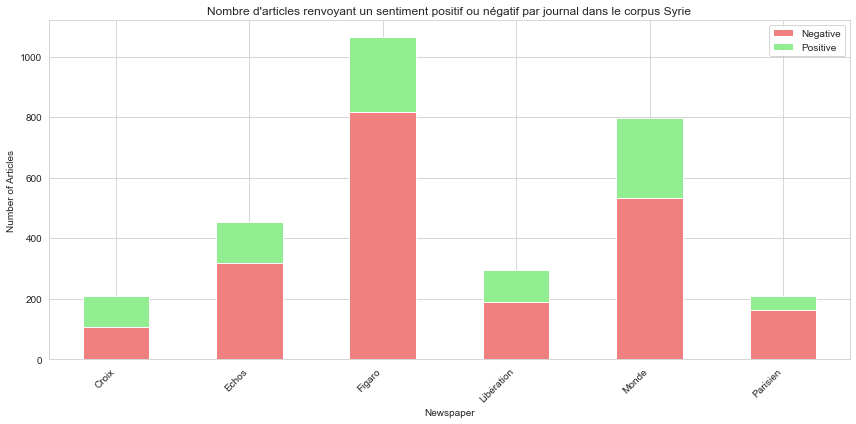

In [144]:
grouped_df = merged_df_syria.groupby(['journal', 'sentiment_polarity']).size().unstack(fill_value=0)

colors = {1: 'lightgreen', -1: 'lightcoral'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal dans le corpus Syrie')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

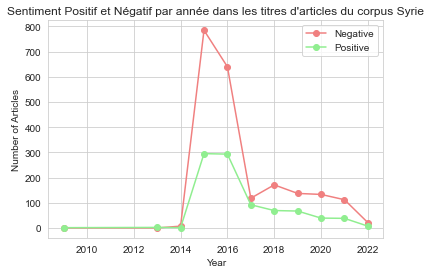

In [141]:
merged_df_syria['date'] = pd.to_datetime(merged_df_syria['date'])
merged_df_syria['year'] = merged_df_syria['date'].dt.year

sentiment_count = merged_df_syria.groupby(['year', 'sentiment_polarity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les titres d'articles du corpus Syrie")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

#### Ukraine

In [142]:
filtered_articles_ukraine = filtered_articles_ukraine.rename(columns={'Titre': 'titre'})
merged_df_ukraine = pd.merge(sentiment_df, filtered_articles_ukraine, on='titre', how='inner')
merged_df_ukraine

,titre,sentiment,date,journal,sentiment_polarity,year,Journal,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,BHL : « Cette société française me fait peur »,"[{'label': 'Negative', 'score': 0.5941807627677917}]",2020-03-05,Echos,-1,2020,Les Echos (site web),2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines, de vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est ...","vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est une","es crimes de la bande à Baader. Jürgen Habermas, et d'autres, ont fait justice de cette ânerie. Pro",Echos
1,Josep Borrell : « C’est la désunion affichée par l’Europe qui la paralyse »,"[{'label': 'Negative', 'score': 0.7684413194656372}]",2019-11-08,Monde,-1,2019,Le Monde (site web),2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties et le conflit identitaire ne va pas se résoudre avec le recours à la violence.,Monde
2,Josep Borrell : « C’est la désunion affichée par l’Europe qui la paralyse »,"[{'label': 'Negative', 'score': 0.7684413194656372}]",2019-11-08,Monde,-1,2019,Le Monde (site web),2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties et le conflit identitaire ne va pas se résoudre avec le recours à la violence.,Monde
3,Quotas d'immigration : l'Europe en ordre dispersé,"[{'label': 'Negative', 'score': 0.8276867866516113}]",2019-11-05,Echos,-1,2019,Les Echos (site web),2019-11-05,CLAUDE FOUQUET,"Si les quotas d'immigration économique que le gouvernement français veut favoriser ont depuis plusieurs années alimenté les débats, ils sont peut-...","vernement français veut favoriser ont depuis plusieurs années alimenté les débats, ils sont peut-être","atre pays (Ukraine, Serbie, Mongolie et Philippines) il sera étendu à cinq autres (Bélarus, Monténégo",Echos
4,Principale Codes en stock Jean-Philippe Toussaint sur la piste de pirates informatiques spécialisés dans le bitcoin,"[{'label': 'Negative', 'score': 0.6379042267799377}]",2019-09-14,Libération,-1,2019,"Libération, no. 11906",2019-09-14,Philippe Lançon,"«A la commission européenne où je travaille, on me croyait au Japon. Ma famille aussi me pensait à Tokyo», mais le narrateur, un homme divorcé qui...","e croyait au Japon. Ma famille aussi me pensait à Tokyo», mais le narrateur, un homme divorcé qui vit","me un page turner, une couleur profonde, inédite et jamais nommée : celle du chagrin. Jean-Philipp",Libération
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,"Migrants: à Calais, l’inlassable ballet nocturne des «small boats» vers l’Angleterre","[{'label': 'Negative', 'score': 0.5154861807823181}]",2020-04-10,Figaro,-1,2020,Le Figaro,2020-04-10,NaN,L'Ukraine a annoncé jeudi avoir envoyé 38 tonnes de barbelés en tant qu'« aide humanitaire » à la Lituanie qui veut renforcer sa frontière avec le...,de barbelés en tant qu'« aide humanitaire » à la Lituanie qui veut renforcer sa frontière avec le Bél,sa réélection en August 2020. Des milliers de manifestants et d'opposants ont été emprisonnés ou contra,Figaro
635,"Brexit : cinq ans après, plus de 80 % des Britanniques voteraient comme en 2016","[{'label': 'Negative', 'score': 0.7093546986579895}]",2022-01-24,Figaro,-1,2022,Le Figaro,2022-01-24,NaN,"Avocat et spécialiste du droit international, directeur pour l'Europe du cabinet de conseil g

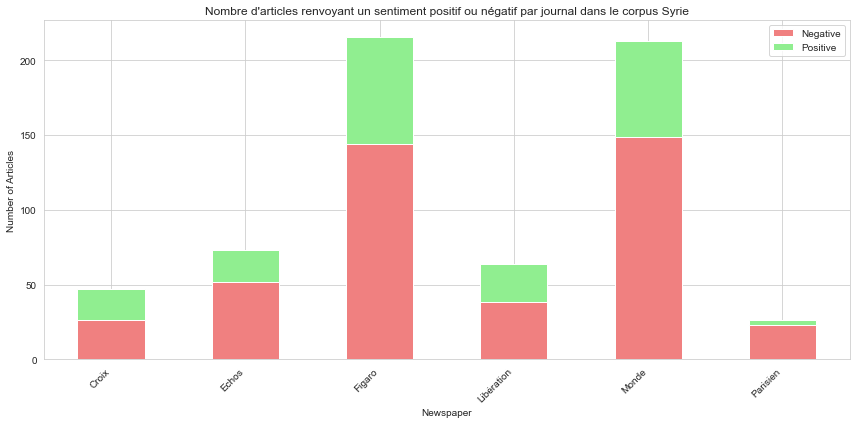

In [145]:
grouped_df = merged_df_ukraine.groupby(['journal', 'sentiment_polarity']).size().unstack(fill_value=0)

colors = {1: 'lightgreen', -1: 'lightcoral'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal dans le corpus Syrie')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

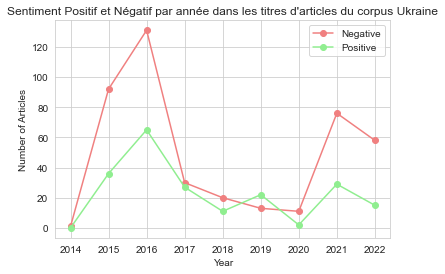

In [147]:
merged_df_ukraine['date'] = pd.to_datetime(merged_df_ukraine['date'])
merged_df_ukraine['year'] = merged_df_ukraine['date'].dt.year
sentiment_count = merged_df_ukraine.groupby(['year', 'sentiment_polarity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les titres d'articles du corpus Ukraine")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

## Text Blob

#### Polarity

In [11]:
#!pip install textblob_fr

   ---------------------------------------- 561.2/561.2 kB 5.9 MB/s eta 0:00:00


In [112]:
AComment=[]
for comment in df['Texte'].apply(str):
    mots = []
    for word in  re.sub("\W"," ",comment ).split():
        mots.append(word)
    AComment.append(mots)


In [113]:
df['mots'] = AComment

In [114]:
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema..."
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro..."
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T..."
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr..."
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales, Rome).",Monde,"[Tribune, L, Italie, est, le, pays, qui, enregistre, à, la, date, du, 25, mars, le, plus, grand, nombre, de, morts, dus, au, coronavirus, 6, 820, ..."
...,...,...,...,...,...,...,...,...,...
8913,Les Echos,Crise migratoire aux Canaries : l'Europe doit favoriser une politique de retours,2020-05-27,NaN,"La déception a été à la hauteur de l'espoir, immense, il y a dix ans. Le 17 december2010, le suicide d'un petit vendeur ambulant de Tunis déclench...","nse, il y a dix ans. Le 17 december2010, le suicide d'un petit vendeur ambulant de Tunis déclenchait",e n'ait été qu'une illustration de cette ligne du célèbre roman « Le Guépard » : « Il faut que tout,Echos,"[La

In [115]:
stop_words=set(STOP_WORDS)

deselect_stop_words = ['n\'','plus','personne','aucun','ni','aucune','rien']
for w in deselect_stop_words:
    if w in stop_words:
        stop_words.remove(w)
    else:
        continue

In [116]:
AllfilteredComment=[]
for comment in df['mots']:
    filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredComment.append(' '.join(filteredComment))

df['motsFiltrer'] = AllfilteredComment

df.head(5)

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux Éta...
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales, Rome).",Monde,"[Tribune, L, Italie, est, le, pays, qui, enregistre, à,

In [117]:
senti_list = []
for i in df['motsFiltrer']:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')

df['sentiment'] = senti_list

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer,sentiment
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux Éta...,Positive
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales, Rome).",Monde,"[Tribune,

In [149]:
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer,sentiment
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux Éta...,Positive
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales, Rome).",Monde,"[Tribune,

In [153]:
fig = px.histogram(df, x="sentiment",color="sentiment", width=1000)
fig.update_layout(
    title_text='Sentiment of reviews',
    xaxis_title_text='Sentiment',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

C:\Users\arceb\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [132]:
negatif=df[df["sentiment"]=="Negative"]
negatif

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer,sentiment
9,Le Monde (site web),Crise des migrants : « Ce qui se passe aujourd’hui est presque pire qu’en 2015 »,2020-03-14,Julia Pascual,"« Dans la nuit du 27 au 28 février, j’ai appris que la Turquie n’allait plus empêcher l’arrivée des réfugiés et des migrants vers la Grèce. Il m’a...",ue la Turquie n’allait plus empêcher l’arrivée des réfugiés et des migrants vers la Grèce. Il m’a sem,re. J’espère que cela agira comme un coup de semonce mais on a souvent l’impression d’être Sisyphe. »,Monde,"[Dans, la, nuit, du, 27, au, 28, février, j, ai, appris, que, la, Turquie, n, allait, plus, empêcher, l, arrivée, des, réfugiés, et, des, migrants...",Dans nuit 27 28 février appris Turquie allait plus empêcher arrivée réfugiés migrants Grèce Il semblé clair allait amener beaucoup Ça renvoyé anné...,Negative
17,Les Echos (site web),Migrants : l'Europe propose d'accueillir 1.500 mineurs bloqués en Grèce,2020-03-09,LES ECHOS,Situation ultra-tendue en Grèce. Lescamps de réfugiés surpeuplés et les conditions de vie de plus en plus précaires rendent impossible l'arrivée d...,giés surpeuplés et les conditions de vie de plus en plus précaires rendent impossible l'arrivée d'une,"de sécurité, de stabilité dans la région et de la crise en Syrie. VIDEO. La Grèce repousse des mil",Echos,"[Situation, ultra, tendue, en, Grèce, Lescamps, de, réfugiés, surpeuplés, et, les, conditions, de, vie, de, plus, en, plus, précaires, rendent, im...",Situation ultra tendue Grèce Lescamps réfugiés surpeuplés conditions vie plus plus précaires rendent impossible arrivée nouvelle vague migrants Et...,Negative
18,La Croix (site web),Un projet européen pour accueillir 1 500 enfants migrants,2020-03-09,Pierre Cochez,"Face aux conditions de vie précaires des migrants dans les îles grecques, l'Allemagne prend la tête d'une coalition de pays européens «?volontaire...","dans les îles grecques, l'Allemagne prend la tête d'une coalition de pays européens «?volontaires?»","prévoyant que les migrants restent en Turquie, en échange d'une aide financière européenne à Ankara.",Croix,"[Face, aux, conditions, de, vie, précaires, des, migrants, dans, les, îles, grecques, l, Allemagne, prend, la, tête, d, une, coalition, de, pays, ...",Face conditions vie précaires migrants îles grecques Allemagne prend tête coalition pays européens volontaires accueil mineurs Une coalition pays ...,Negative
26,Le Parisien,"Syrie, un cauchemar sans fin Des milliers de réfugiés syriens se pressent aux portes de l'Europe après l'ouverture par la Turquie de ses frontières.",2020-03-03,NaN,Par Henri Vernet Il aura fallu que l'Europe se retrouve à nouveau sous la pression d'un débarquement de centaines de milliers de migrants pour...,ue l'Europe se retrouve à nouveau sous la pression d'un débarquement de centaines de milliers de migr,"et Macron sur la frontière turque, un peu à la manière d'un Mitterrand débarquant à Sarajevo en plei",Parisien,"[Par, Henri, Vernet, Il, aura, fallu, que, l, Europe, se, retrouve, à, nouveau, sous, la, pression, d, un, débarquement, de, centaines, de, millie...",Par Henri Vernet Il fallu Europe retrouve pression débarquement centaines milliers migrants intéresse situation Syrie Le désastre humanitaire régi...,Negative
29,"Les Echos, no. 23140",L'Union européenne renforce sa surveillance des eaux libyennes,2020-02-18,YVES BOURDILLON,L'Europe va renforcer sa lutte contre le trafic d'armes en Libye. Le Conseil des ministres des Affaires étrangères de l'Union européenne a décidé ...,'armes en Libye. Le Conseil des ministres des Affaires étrangères de l'Union européenne a décidé lund,"pération Sophia, lancée en 2015 au plus fort de la crisedesmigrants, n'est de facto plus opérationnel",Echos,"[L, Europe, va, renforcer, sa, lutte, contre, le, trafic, d, armes, en, Libye, Le, Conseil, des, ministres, des, Affaires, étrangères, de, l, Unio...",Europe renforcer lutte contre trafic armes Libye Le Con

In [179]:
selected_text = df.loc[9, 'Texte']
print(selected_text)

« Dans la nuit du 27 au 28 février, j’ai appris que la Turquie n’allait plus empêcher l’arrivée des réfugiés et des migrants vers la Grèce. Il m’a semblé très clair que ça allait amener beaucoup de gens. Ça m’a renvoyé aux années 2015-2016. J’étais déjà à Athènes. A l’époque, cinq mille personnes débarquaient chaque jour sur les îles de la mer Egée. Mais, aujourd’hui, on n’est plus du tout dans le même état d’esprit.  Quarante-deux mille demandeurs d’asile vivent sur cinq îles dans des conditions terribles, et il y a une usure de la solidarité et de l’acceptation sur place, et une tension extrême entre les populations locales et la police. Ce n’est la faute ni des réfugiés ni des Grecs, mais des promesses non tenues.   A l’époque, les Etats ont fait faire à la Grèce des choses qui n’étaient pas autorisées dans leur propre législation, comme considérer que la Turquie était un pays tiers sûr où renvoyer les demandeurs d’asile. L’UE a arrêté les relocalisations de réfugiés en Europe et de

In [131]:
selected_text = df.loc[902, 'sentiment']
print(selected_text)

Positive


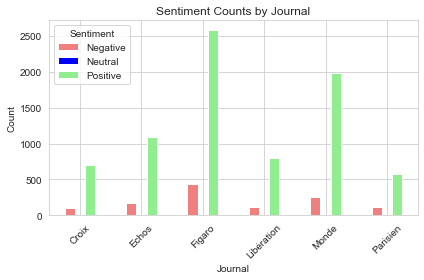

In [152]:
journal_sentiment_counts = df.groupby(['CJournal', 'sentiment']).size().unstack(fill_value=0)

colors = ['lightcoral', 'blue', 'lightgreen']

journal_sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Counts by Journal')
plt.xlabel('Journal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [136]:
journal_sentiment_counts

sentiment,Negative,Neutral,Positive
CJournal,,,
Croix,96,0,701
Echos,165,1,1098
Figaro,441,0,2589
Libération,109,0,797
Monde,251,0,1981
Parisien,108,0,581


In [165]:
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer,sentiment,year
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive,2020
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive,2020
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux Éta...,Positive,2020
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive,2020
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Libre université internationale des études sociales,

<Figure size 720x432 with 0 Axes>

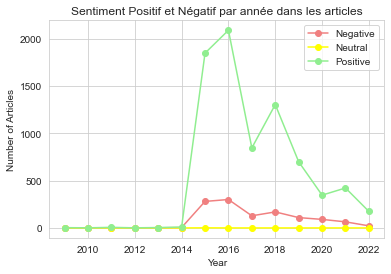

In [160]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year

sentiment_count = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'yellow', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les articles")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.grid(True)

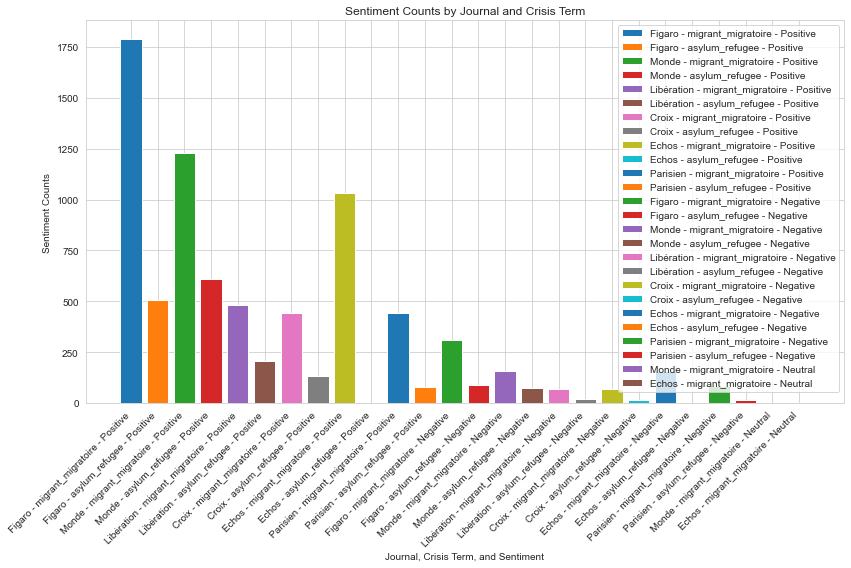

In [102]:
grouped_sentiment_counts = df.groupby(['CJournal', 'crisis_term', 'sentiment']).size().unstack(fill_value=0)

# Plotting sentiment for each Simplified Journal and crisis term
plt.figure(figsize=(12, 8))

# Iterate over each sentiment category
for sentiment in df['sentiment'].unique():
    # Subset the DataFrame for the specific sentiment
    df_sentiment = df[df['sentiment'] == sentiment]
    # Group by 'CJournal', 'crisis_term', and calculate sentiment counts
    grouped_sentiment_counts = df_sentiment.groupby(['CJournal', 'crisis_term']).size().unstack(fill_value=0)

    # Iterate over unique newspapers and crisis terms
    for journal in df['CJournal'].unique():
        for crisis_term in df['crisis_term'].unique():
            try:
                # Get sentiment count for the specific combination
                sentiment_count = grouped_sentiment_counts.loc[journal, crisis_term]
                # Plotting the sentiment count
                plt.bar(f"{journal} - {crisis_term} - {sentiment}", sentiment_count, label=f"{journal} - {crisis_term} - {sentiment}")
            except KeyError:
                pass

plt.title('Sentiment Counts by Journal and Crisis Term')
plt.xlabel('Journal, Crisis Term, and Sentiment')
plt.ylabel('Sentiment Counts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Syrie

In [174]:
filtered_articles_syria = filtered_articles_syria.rename(columns={'titre': 'Titre'})
merged_df_syrie = pd.merge(df, filtered_articles_syria, on='Titre', how='inner')
merged_df_syrie

,Journal_x,Titre,Date_x,Auteur_x,Texte_x,extrait_debut_x,extrait_fin_x,CJournal_x,mots,motsFiltrer,sentiment,year,Journal_y,Date_y,Auteur_y,Texte_y,extrait_debut_y,extrait_fin_y,CJournal_y
0,Le Monde (site web),Les sept infos non liées au coronavirus que vous avez peut-être manquées cette semaine,2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde,"[On, ne, peut, pas, vous, reprocher, de, penser, que, le, monde, s, est, arrêté, de, tourner, à, cause, de, l, épidémie, de, Covid, 19, Le, Monde,...",On reprocher penser monde arrêté tourner cause épidémie Covid 19 Le Monde publié large majorité titres liés coronavirus semaine Du lundi 16 jeudi ...,Positive,2020,Le Monde (site web),2020-03-20,Le Monde,On ne peut pas vous reprocher de penser que le monde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une la...,nde s’est arrêté de tourner à cause de l’épidémie de Covid-19 : Le Monde a lui-même publié une large,"véritable monde alternatif, serein et chaleureux, dans lequel se réfugier dans les semaines à venir.",Monde
1,Le Monde,"Télésommet sur Idlib entre les Européens et Erdogan La vidéoconférence entre M. Macron, Mme Merkel, M. Johnson et le président turc a permis d'en...",2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde,"[Istanbul, correspondante, Le, coronavirus, bouleverse, tout, mais, les, dirigeants, européens, ont, encore, d, autres, urgences, à, régler, Envis...",Istanbul correspondante Le coronavirus bouleverse dirigeants européens urgences régler Envisagée initialement Istanbul conférence Emmanuel Macron ...,Positive,2020,Le Monde,2020-03-19,Marie Jégo et Piotr Smolar (à paris) Marie Jégo et Piotr Smolar (à paris),"Istanbul correspondante - Le coronavirus bouleverse tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialem...","se tout, mais les dirigeants européens ont encore d'autres urgences à régler. Envisagée initialement","mmentaires, en rappelant « l'offensive militaire imprudente et impitoyable à Idlib » conduite par le",Monde
2,"Le Figaro, no. 23505",EN BREF,2020-03-12,"Portes, Thierry",Collision entre un navire grec et un patrouilleur turc Les garde-côtes grecs ont déclaré qu'un patrouilleur turc avait percuté mercredi un de leur...,turc Les garde-côtes grecs ont déclaré qu'un patrouilleur turc avait percuté mercredi un de leurs na,"en Afghanistan, ouvrant la voie à des pourparlers historiques entre Kaboul et les insurgés, après l'a",Figaro,"[Collision, entre, un, navire, grec, et, un, patrouilleur, turc, Les, garde, côtes, grecs, ont, déclaré, qu, un, patrouilleur, turc, avait, percut...",Collision navire grec patrouilleur turc Les garde côtes grecs déclaré qu patrouilleur turc percuté mercredi navires causant toutefois dégâts mineu...,Positive,2020,"Le Figaro, no. 22442",2016-10-05,"Isaac, Jean-Baptiste",Menace d'attentat : un jeune homme de 18 ans mis en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis...,en examen et écroué Un jeune homme de 18 ans soupçonné de vouloir commettre une attaque a été mis en,": nécessité fait loi. Aux responsables politiques, il revient de faire un juste usage des frontières",Figaro
3,"Le Figaro, no. 23505",EN BREF,2020-03-12,"Portes, Thierry",C

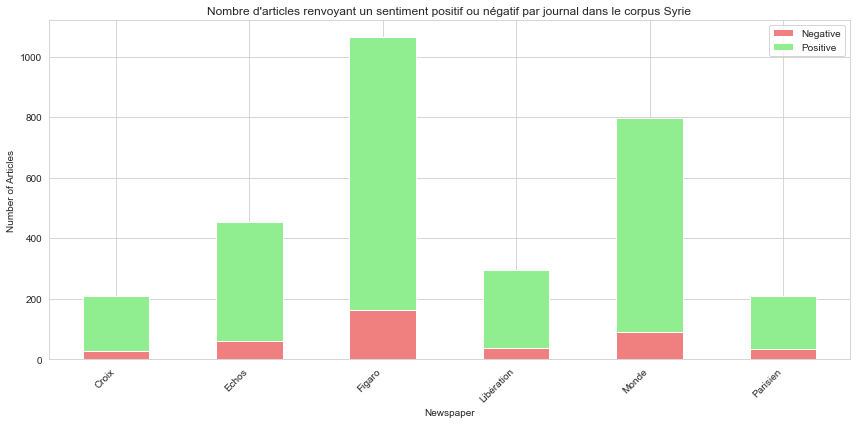

In [175]:
grouped_df = merged_df_syrie.groupby(['CJournal_x', 'sentiment']).size().unstack(fill_value=0)

colors = {"Positive": 'lightgreen', "Negative": 'lightcoral'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal dans le corpus Syrie')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

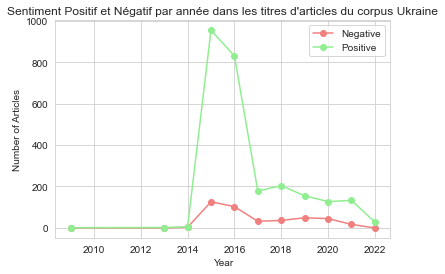

In [176]:
merged_df_syrie['date'] = pd.to_datetime(merged_df_syrie['Date_x'])
merged_df_syrie['year'] = merged_df_syrie['date'].dt.year
sentiment_count = merged_df_syrie.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les titres d'articles du corpus Ukraine")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

### Ukraine

In [166]:
filtered_articles_ukraine = filtered_articles_ukraine.rename(columns={'titre': 'Titre'})
merged_df_ukraine = pd.merge(df, filtered_articles_ukraine, on='Titre', how='inner')
merged_df_ukraine

,Journal_x,Titre,Date_x,Auteur_x,Texte_x,extrait_debut_x,extrait_fin_x,CJournal_x,mots,motsFiltrer,sentiment,year,Journal_y,Date_y,Auteur_y,Texte_y,extrait_debut_y,extrait_fin_y,CJournal_y
0,Les Echos (site web),BHL : « Cette société française me fait peur »,2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines, de vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est ...","vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est une","es crimes de la bande à Baader. Jürgen Habermas, et d'autres, ont fait justice de cette ânerie. Pro",Echos,"[Vous, avez, entrepris, depuis, quelques, semaines, de, vous, rendre, sur, plusieurs, théâtres, de, conflit, Oui, pour, votre, confrère, Paris, Ma...",Vous avez entrepris semaines théâtres conflit Oui confrère Paris Match série guerres oubliées oublient dessine destin Le Nigeria opère indifférenc...,Positive,2020,Les Echos (site web),2020-03-05,DANIEL FORTIN; NICOLAS BARRE,"Vous avez entrepris, depuis quelques semaines, de vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est ...","vous rendre sur plusieurs théâtres de conflit. Oui, pour votre confrère « Paris-Match » . C'est une","es crimes de la bande à Baader. Jürgen Habermas, et d'autres, ont fait justice de cette ânerie. Pro",Echos
1,Le Monde (site web),Josep Borrell : « C’est la désunion affichée par l’Europe qui la paralyse »,2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties et le conflit identitaire ne va pas se résoudre avec le recours à la violence.,Monde,"[Josep, Borrell, est, l, actuel, ministre, des, affaires, étrangères, de, l, Espagne, Ce, socialiste, catalan, doit, devenir, haut, représentant, ...",Josep Borrell actuel ministre affaires étrangères Espagne Ce socialiste catalan devenir haut représentant Union européenne UE affaires extérieures...,Positive,2019,Le Monde (site web),2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties et le conflit identitaire ne va pas se résoudre avec le recours à la violence.,Monde
2,Le Monde (site web),Josep Borrell : « C’est la désunion affichée par l’Europe qui la paralyse »,2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties et le conflit identitaire ne va pas se résoudre avec le recours à la violence.,Monde,"[Josep, Borrell, est, l, actuel, ministre, des, affaires, étrangères, de, l, Espagne, Ce, socialiste, catalan, doit, devenir, haut, représentant, ...",Josep Borrell actuel ministre affaires étrangères Espagne Ce socialiste catalan devenir haut représentant Union européenne UE affaires extérieures...,Positive,2019,Le Monde (site web),2019-11-08,"Propos recueillis par Sandrine Morel, Jean-Pierre Stroobants et Sylvie Kauffmann",Josep Borrell est l’actuel ministre des affaires étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européen...,étrangères de l’Espagne. Ce socialiste catalan doit devenir haut représentant de l’Union européenne (,ivisée en deux parties e

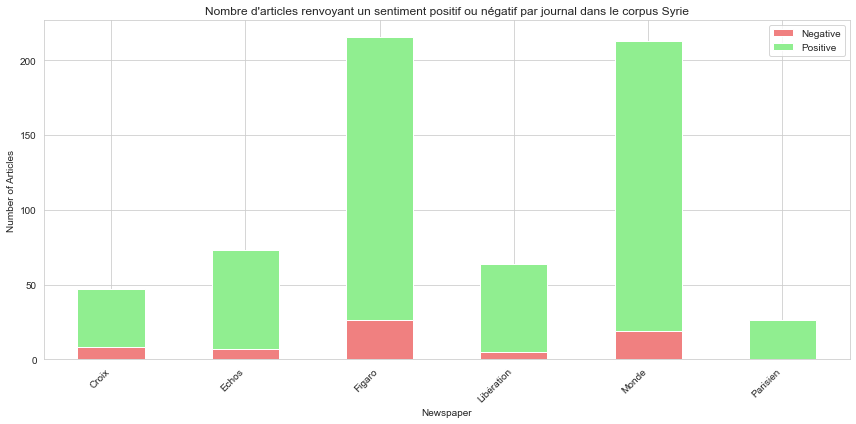

In [168]:
grouped_df = merged_df_ukraine.groupby(['CJournal_x', 'sentiment']).size().unstack(fill_value=0)

colors = {"Positive": 'lightgreen', "Negative": 'lightcoral'}
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in grouped_df.columns])
plt.title('Nombre d\'articles renvoyant un sentiment positif ou négatif par journal dans le corpus Syrie')
plt.xlabel('Newspaper')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

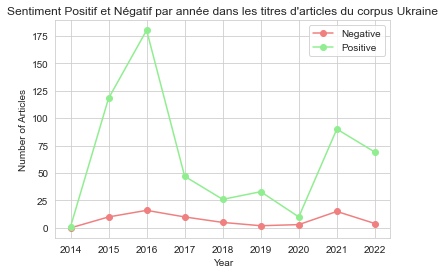

In [172]:
merged_df_ukraine['date'] = pd.to_datetime(merged_df_ukraine['Date_x'])
merged_df_ukraine['year'] = merged_df_ukraine['date'].dt.year
sentiment_count = merged_df_ukraine.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='line', marker='o', color=['lightcoral', 'lightgreen'])
plt.title("Sentiment Positif et Négatif par année dans les titres d'articles du corpus Ukraine")
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(['Negative', 'Positive'])
plt.grid(True)
plt.show()

#### Subjectivity

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [177]:
subjectivities = []

for text in df['motsFiltrer']:
    blob = tb(text)
    subjectivity = blob.subjectivity
    subjectivities.append(subjectivity)

# Add subjectivities to DataFrame
df['subjectivity'] = subjectivities

In [178]:
df

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal,mots,motsFiltrer,sentiment,year,subjectivity
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle","LES SYMBOLES comptent parfois plus que les faits. Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les s...","Sur les camions militaires qui, en colonnes, ont relié Rome à Bergame la semaine dernière, les stick","Deux semaines pour se ressaisir et s'unir ou pour se résigner à la dislocation de l'Europe, qui ne se",Figaro,"[LES, SYMBOLES, comptent, parfois, plus, que, les, faits, Sur, les, camions, militaires, qui, en, colonnes, ont, relié, Rome, à, Bergame, la, sema...",LES SYMBOLES comptent plus faits Sur camions militaires colonnes relié Rome Bergame semaine dernière stickers géants ornés drapeaux russe italien ...,Positive,2020,0.450000
1,Le Monde,"Récit Les trois semaines qui ont chamboulé l'orthodoxie économique européenne Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la r...",2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret et Virginie Malingre","Londres, Berlin, Rome et Bruxelles correspondants - Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en ...","- Jeudi 26 mars, les Vingt-Sept devaient se réunir en visioconférence pour la troisième fois en moin","pandémie touche tout le monde, indifféremment de la tenue de ses comptes publics, n'est pas si loin.",Monde,"[Londres, Berlin, Rome, et, Bruxelles, correspondants, Jeudi, 26, mars, les, Vingt, Sept, devaient, se, réunir, en, visioconférence, pour, la, tro...",Londres Berlin Rome Bruxelles correspondants Jeudi 26 mars Vingt Sept devaient réunir visioconférence fois semaines Au programme discussions crise...,Positive,2020,0.512963
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure du Coronavirus: «une fuite en avant suicidaire dans le déni»,2020-03-26,"Tandonnet, Maxime","Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompr...","contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié André Tardieu. L’incompris",es yeux et de se préparer au changement d’un monde plutôt que de s’enferrer dans des obsessions qui s,Figaro,"[Fin, observateur, de, la, vie, politique, française, et, contributeur, régulier, du, FigaroVox, Maxime, Tandonnet, a, notamment, publié, André, T...",Fin observateur vie politique française contributeur régulier FigaroVox Maxime Tandonnet publié André Tardieu incompris Perrin 2019 Je heureux Éta...,Positive,2020,0.000000
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamboulé l’orthodoxie économique européenne,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet et Virginie Malingre","Jeudi 26 mars, les Vingt-Sept doivent se réunir en visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions...","n visioconférence pour la troisième fois en moins de trois semaines. Au programme des discussions, la","e la tenue de ses comptes publics, n’est pas si loin. Comme quoi, tous les tabous ne sont pas tombés…",Monde,"[Jeudi, 26, mars, les, Vingt, Sept, doivent, se, réunir, en, visioconférence, pour, la, troisième, fois, en, moins, de, trois, semaines, Au, progr...",Jeudi 26 mars Vingt Sept réunir visioconférence fois semaines Au programme discussions crise due coronavirus Europe entière exception Suède confin...,Positive,2020,0.512963
4,Le Monde (site web),"Marc Lazar : « Plus l’Italie fait nation face à l’épidémie, plus elle s’éloigne de l’Union européenne »",2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à la date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 per...,date du 25 mars le plus grand nombre de morts dus au coronavirus – 6 820 – et plus de 69 000 personn,"t de la School of Government de la Luiss (Lib

In [180]:
selected_text = df.loc[8915, 'Texte']
print(selected_text)

Bruxelles espère arriver à des « résultats importants » en 2021 sur la réforme de l'asile présentée en september Mays sans percée jusqu'à présent, les Vingt-Sept restant très divisés sur cette question ultrasensible, cinq ans après la crise migratoire de 2015.   » LIRE AUSSI - Bruxelles dévoile son nouveau pacte migratoire    Les pays continuent à s'opposer notamment sur la répartition des demandeurs d'asile, les pays en première ligne pour l'arrivée de migrants (Italie, Espagne, Grèce, Malte) réclamant davantage de solidarité de la part de leurs partenaires, tandis que les pays de l'Est comme la Hongrie et la Pologne refusent de se voir imposer l'accueil de réfugiés. « J'espère que nous arriverons à des résultats importants pendant la présidence portugaise » de l'Union européenne, qui commence le 1er January pour six mois, a déclaré lundi 14 decemberla commissaire européenne aux Affaires intérieures, Ylva Johansson, lors d'une conférence de presse à l'issue d'une réunion des ministres

In [181]:
selected_text = df.loc[2, 'Texte']
print(selected_text)

Fin observateur de la vie politique française et contributeur régulier du FigaroVox, Maxime Tandonnet a notamment publié  André Tardieu. L’incompris  (Perrin, 2019).  «Je suis très heureux que les États membres de l’Union européenne soient parvenus aujourd’hui à un accord politique sur l’ouverture des négociations d’adhésion avec l’Albanie et la Macédoine du Nord […] Je félicite de tout cœur ces deux pays. Cela envoie également un message fort et clair aux Balkans occidentaux: votre avenir est dans l’UE.»  Cette communication de M. Oliver Varhelyi, Commissaire européen à l’Élargissement, diffusée sur Twitter à l’issue d’une réunion avec les ministres des États membres de l’Union européenne revêt une tonalité étrangement décalée, presque surréaliste.    L’Europe est frappée de plein fouet par la pandémie de COVID-19. Elle est même aujourd’hui la région du monde la plus touchée. Les morts se comptent par milliers en Italie, en Espagne et en France, et l’épidémie progresse partout, y comp

### FLAUBERT

In [113]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

loaded_tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_large_cased')
loaded_model = AutoModelForSequenceClassification.from_pretrained("DemangeJeremy/4-sentiments-with-flaubert")

nlp = pipeline('sentiment-analysis', model=loaded_model, tokenizer=loaded_tokenizer)

pytorch_model.bin:   0%|          | 0.00/1.49G [00:00<?, ?B/s]

C:\Users\arceb\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arceb\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



In [115]:
# Creating an empty list to store the results
articles_sentiment = []

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    try:
        content = row['Titre']
        sentiment = nlp(content)
        articles_sentiment.append({'article': content, 'sentiment': sentiment})
    except Exception as e:
        print(f"Error processing article at index {index}: {e}")

KeyboardInterrupt: 

In [116]:
articles_sentiment

[{'article': "L'agenda caché de Moscou en Italie",
  'sentiment': [{'label': 'POSITIVE', 'score': 0.6883031129837036}]},
 {'article': "Récit   Les trois semaines qui ont chamboulé l'orthodoxie économique européenne  Un sommet devait se tenir, jeudi 26 mars, pour faire avancer la réforme de la zone euro, dont la solidité est mise à\xa0 mal par la pandémie",
  'sentiment': [{'label': 'MIXED', 'score': 0.4768875241279602}]},
 {'article': "à\x89largissement de l'Union européenne à\xa0 l'heure du Coronavirus: «une fuite en avant suicidaire dans le déni»",
  'sentiment': [{'label': 'MIXED', 'score': 0.40838807821273804}]},
 {'article': "Coronavirus\xa0: les trois semaines qui ont chamboulé l'orthodoxie économique européenne",
  'sentiment': [{'label': 'OBJECTIVE', 'score': 0.4552094638347626}]},
 {'article': "Marc Lazar\xa0: «\xa0Plus l'Italie fait nation face à\xa0 l'épidémie, plus elle s'éloigne de l'Union européenne\xa0»",
  'sentiment': [{'label': 'OBJECTIVE', 'score': 0.5507673621177673